In [1]:
import sys
sys.path.append("../src")
from utils import *

In [2]:
adata = sc.read(os.path.join(datadir, "anca_samples_clustered.h5ad"))

In [3]:
adata.uns["log1p"]["base"] = None

In [4]:
adata.obs["cluster_annot_1"] = [e.replace("/", "_") for e in adata.obs["cluster_annot"].tolist()]

In [5]:
sc.tl.rank_genes_groups(adata, method="wilcoxon", groupby="cluster_annot_1", use_raw=False, key_added="wilcoxon_cluster_annot_all")
df_deg = sc.get.rank_genes_groups_df(adata, group=None, pval_cutoff=0.05, key="wilcoxon_cluster_annot_all")

In [7]:
df_deg.rename(columns={"group": "cluster",
                       "names": "gene"}, inplace=True)

In [8]:
df_deg.to_csv(os.path.join(datadir, f"DEG_anca_samples_genes_all.csv"), 
                                                    index=False)

In [5]:
sc.tl.rank_genes_groups(adata, method="wilcoxon", groupby="cluster_annot_1", use_raw=False, key_added="wilcoxon_cluster_annot")
df_deg = sc.get.rank_genes_groups_df(adata, group=None, pval_cutoff=0.05, log2fc_min=0.25, key="wilcoxon_cluster_annot")

In [6]:
for cluster in df_deg.group.unique():
    genelist = df_deg[df_deg["group"]==cluster]["names"].tolist()
    pd.DataFrame(genelist, columns=["gene"]).to_csv(os.path.join(datadir, f"DEG_anca_samples_genes_{cluster}.csv"), 
                                                    index=False)

In [7]:
for cluster in df_deg.group.unique():
    genelist = df_deg[df_deg["group"]==cluster]["names"].tolist()
    print(cluster, len(genelist))

CNT_PC 781
CNT_PC_IC 1920
DCT_CNT 377
Inflamed glomerular 1958
Inflamed tubulointerstitial 2483
LOH 1467
Normal glomerular 1145
PT 1612
PT_DCT 1240
PT_TAL 1553
Tubulointerstitial 299
Tubulointerstitial_Vessels 930


In [8]:
tab = pd.DataFrame(adata.obs["cluster_annot"].value_counts(normalize=True)).T
tab

,PT,LOH,Inflamed tubulointerstitial,PT/TAL,CNT/PC/IC,Tubulointerstitial/Vessels,PT/DCT,Normal glomerular,Inflamed glomerular,CNT/PC,Tubulointerstitial,DCT/CNT
cluster_annot,0.269906,0.157391,0.130726,0.117346,0.090402,0.06736,0.048128,0.047106,0.028152,0.017281,0.01533,0.010871


In [9]:
tab.columns

CategoricalIndex(['PT', 'LOH', 'Inflamed tubulointerstitial', 'PT/TAL',
                  'CNT/PC/IC', 'Tubulointerstitial/Vessels', 'PT/DCT',
                  'Normal glomerular', 'Inflamed glomerular', 'CNT/PC',
                  'Tubulointerstitial', 'DCT/CNT'],
                 categories=['LOH', 'Inflamed tubulointerstitial', 'CNT/PC/IC', 'PT/DCT', ..., 'CNT/PC', 'Tubulointerstitial', 'DCT/CNT', 'PT'], ordered=False, dtype='category')

In [12]:
colors_dict = {"PT": "#1f77b4",
               "PT/DCT": "#1f88b9",
               "DCT/CNT": "#aec7e8", 
               "PT/TAL": "#ff7f0e",
               "CNT/PC": "#2ca02c",
               "CNT/PC/IC": "#98df8a",
               "LOH": "#ff9896",
               "Tubulointerstitial": "#c49c94",
               "Tubulointerstitial/Vessels": "#219EBC", #
               "Normal glomerular": "#bcbd22",
               "Inflamed glomerular": "#d62728",
               "Inflamed tubulointerstitial": "#900D09"
              }

In [13]:
color = []
for key in tab.columns:
    color.append(colors_dict[key])

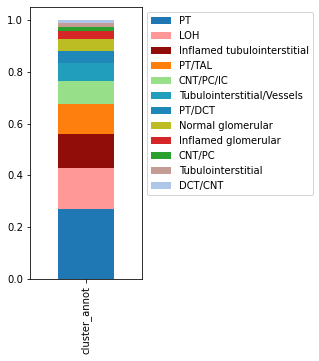

In [14]:
tab.plot(kind="bar", stacked=True, figsize=(2,5), color=color)
plt.legend(bbox_to_anchor=(1,1))